In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.manifold import TSNE
from wordcloud import WordCloud

In [15]:
df = pd.read_csv("/content/data.csv", sep=",")
genres_df = pd.read_csv('/content/data_by_genres.csv', sep=",")
year_df = pd.read_csv('/content/data_by_year.csv', sep=",")
artist_df = pd.read_csv('/content/data_by_artist.csv', sep=",")


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102519 entries, 0 to 102518
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           102519 non-null  float64
 1   year              102519 non-null  int64  
 2   acousticness      102519 non-null  float64
 3   artists           102519 non-null  object 
 4   danceability      102519 non-null  float64
 5   duration_ms       102519 non-null  int64  
 6   energy            102518 non-null  float64
 7   explicit          102518 non-null  float64
 8   id                102518 non-null  object 
 9   instrumentalness  102518 non-null  float64
 10  key               102518 non-null  float64
 11  liveness          102518 non-null  float64
 12  loudness          102518 non-null  float64
 13  mode              102518 non-null  float64
 14  name              102518 non-null  object 
 15  popularity        102518 non-null  float64
 16  release_date      10

In [17]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0.0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10.0,0.665,-20.096,1.0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4.0,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0.0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7.0,0.160,-12.441,1.0,Clancy Lowered the Boom,5.0,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0.0,1o6I8BglA6ylDMrIELygv1,0.913000,3.0,0.101,-14.850,1.0,Gati Bali,5.0,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0.0,3ftBPsC5vPBKxYSee08FDH,0.000028,5.0,0.381,-9.316,1.0,Danny Boy,3.0,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0.0,4d6HGyGT8e121BsdKmw9v6,0.000002,3.0,0.229,-10.096,1.0,When Irish Eyes Are Smiling,2.0,1921,0.0380,101.665


In [18]:
df['decade'] = df['year'].apply(lambda year : f'{(year//10)*10}s' )

Text(0.5, 1.0, 'Distribution of Music')

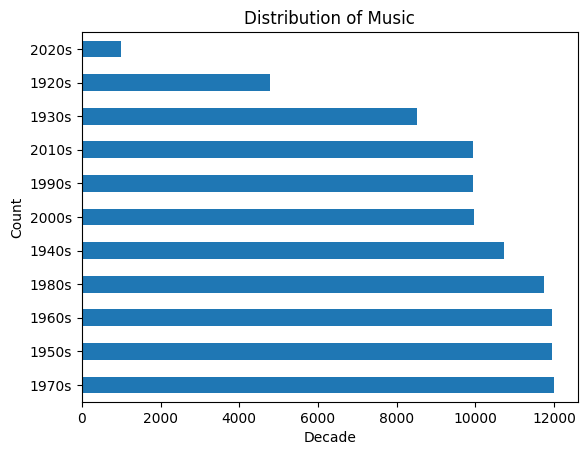

In [19]:
decades = df.decade.value_counts()
decades.plot(kind='barh')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Distribution of Music')

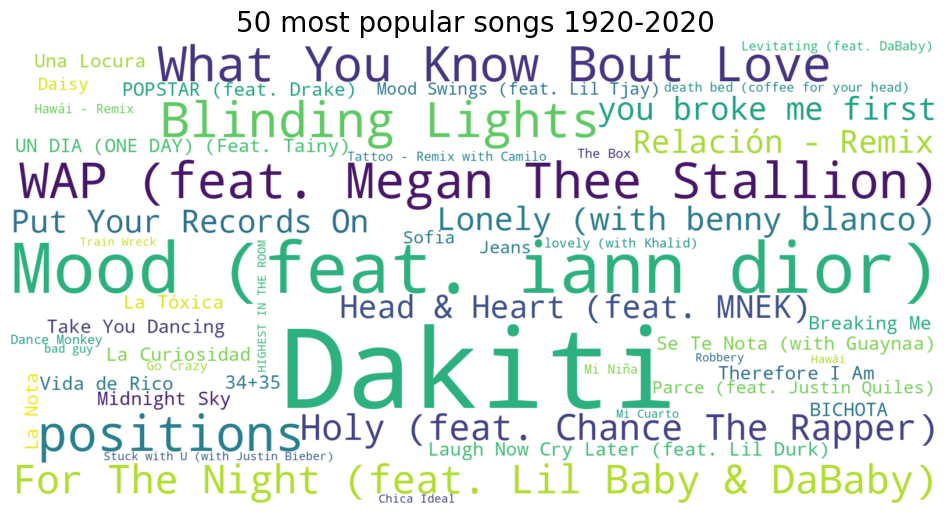

In [20]:
song_popularity = df[['name', 'popularity']].set_index('name').to_dict()['popularity']
song_popularity = sorted(song_popularity.items(), key=lambda x: x[1], reverse=True)

wordcloud = WordCloud(width=1600, height=800, max_words=50, background_color='white').generate_from_frequencies(dict(song_popularity))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('50 most popular songs 1920-2020', fontsize=20)
plt.show()

In [21]:
kmeans_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=15))
])

song_kmeans_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=30))
])

In [22]:
X = genres_df.select_dtypes(np.number)
kmeans_pipeline.fit(X)
genres_df['Cluster'] = kmeans_pipeline.predict(X)

In [23]:
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('PCA', PCA(n_components = 2))
])

genre_visual = pca_pipeline.fit_transform(X)

projection = pd.DataFrame(columns=['x', 'y'], data=genre_visual)
projection['title'] = genres_df.genres
projection['cluster'] = genres_df.Cluster

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'],title='Clusters of Genres')
fig.show()

In [24]:
tsne_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('tsne', TSNE(n_components=2, verbose=False))
])

genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)

projection['title'] = genres_df.genres
projection['cluster'] = genres_df.Cluster

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

In [33]:
print(X.isna().any())

valence             False
year                False
acousticness        False
danceability        False
duration_ms         False
energy               True
explicit             True
instrumentalness     True
key                  True
liveness             True
loudness             True
mode                 True
popularity           True
speechiness          True
tempo                True
dtype: bool


In [34]:
X = X.dropna()

In [35]:
print(np.isinf(X).any())


valence             False
year                False
acousticness        False
danceability        False
duration_ms         False
energy              False
explicit            False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
popularity          False
speechiness         False
tempo               False
dtype: bool
